In [274]:
import numpy as np
import matplotlib.pyplot as plt

In [275]:
from dataclasses import dataclass
import itertools as it
from importlib import reload

In [383]:
import trees
import models

trees = reload(trees)
models = reload(models)

from trees import DecisionTree, RandomForest
from models import grid_search, FunctionSelection

Generate a **dataset**.

In [278]:
rand = np.random.RandomState(124)
X = np.concatenate((rand.normal(3, 2, (250, 2)), rand.normal(15, 2, (250, 2)) - [12, 0]))
y = np.concatenate((np.ones(len(X)//2), np.zeros(len(X)//2)))

X.shape, y.shape

((500, 2), (500,))

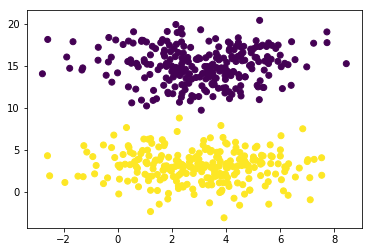

In [279]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [280]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree

In [281]:
decision_tree = DecisionTree(FunctionSelection.cross_entropy, 2, 2)
decision_tree.train(X_train, X_test)

DecisionTree(entropy=<function FunctionSelection.cross_entropy at 0x7f5a4b34f7b8>, leaf_count=2, max_depth=2, sepr=50)

In [282]:
decision_tree.score(y_train, y_test)

1.0

Test on **IRIS**.

In [283]:
from sklearn.datasets import load_iris

iris = load_iris()

X_travel, y_train, t_travel, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, 
                                                    random_state=123)

X_train, v_train, X_test, v_test = train_test_split(X_travel, t_travel,
                                                    test_size=0.2,
                                                    random_state=123)

In [284]:
possible_params = list(it.product([3, 4, 5], [2, 3, 4, 5]))
params = [{'max_depth': x, 'leaf_count': y} for x, y in possible_params]
params[:5]

[{'max_depth': 3, 'leaf_count': 2},
 {'max_depth': 3, 'leaf_count': 3},
 {'max_depth': 3, 'leaf_count': 4},
 {'max_depth': 3, 'leaf_count': 5},
 {'max_depth': 4, 'leaf_count': 2}]

In [285]:
best_model, best_score = grid_search(DecisionTree, 
                                     FunctionSelection.cross_entropy, 
                                     params, X_train, X_test)

In [286]:
best_model, best_score

(DecisionTree(entropy=<function FunctionSelection.cross_entropy at 0x7f5a4b34f7b8>, leaf_count=2, max_depth=4, sepr=50),
 0.8947368421052632)

In [287]:
best_model.score(y_train, y_test)

0.9333333333333333

Generate non linearly separately *n_classes=3* **dataset**.

In [384]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(mean=(10, 10), cov=0.5, n_samples=1000, n_classes=3, random_state=145)

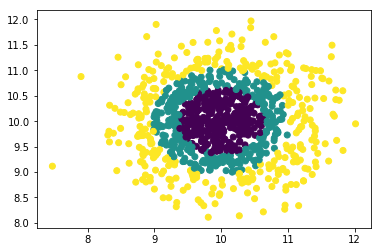

In [385]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [386]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=126)

In [387]:
possible_params = list(it.product([25, 30, 35, 40], [20, 25, 30, 35]))
params = [{'max_depth': x, 'leaf_count': y} for x, y in possible_params]
params[:5]

[{'max_depth': 25, 'leaf_count': 20},
 {'max_depth': 25, 'leaf_count': 25},
 {'max_depth': 25, 'leaf_count': 30},
 {'max_depth': 25, 'leaf_count': 35},
 {'max_depth': 30, 'leaf_count': 20}]

See how **DecisionTree** does on non linearly separately dataset.

In [388]:
best_model, best_score = grid_search(DecisionTree, 
                                     FunctionSelection.cross_entropy, 
                                     params, X_train, X_test)

In [389]:
best_model, best_score

(DecisionTree(entropy=<function FunctionSelection.cross_entropy at 0x7f5a4aeac510>, max_depth=30, leaf_count=20, sepr=50),
 0.86875)

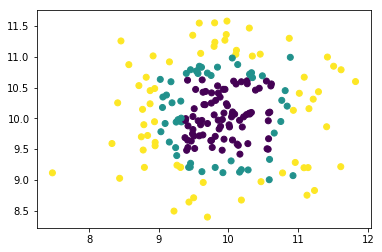

In [390]:
pred = best_model.predict(y_train)

# what the model learned
plt.scatter(y_train[:, 0], y_train[:, 1], c=pred);

In [391]:
best_model.score(y_train, y_test)

0.89

## RandomForest.

**RandomForestClassifier** from *sklearn*.

In [392]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(10)
forest.fit(X_train, X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

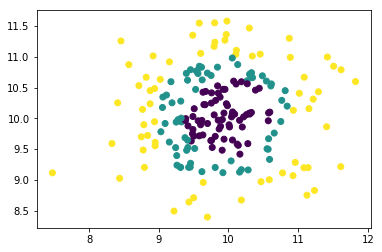

In [393]:
pred = forest.predict(y_train)

plt.scatter(y_train[:, 0], y_train[:, 1], c=pred);

In [394]:
forest.score(y_train, y_test)

0.97

Implemented **RandomForest**.

In [395]:
random_forest = RandomForest(10, entropy='cross-entropy')
random_forest.train(X_train, X_test)

RandomForest(n_trees=10, max_depth=inf, leaf_count=inf, entropy='cross-entropy')

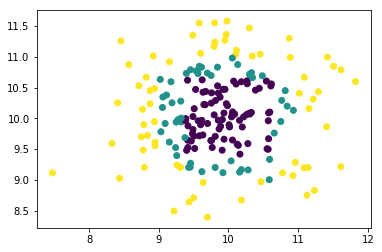

In [396]:
pred = random_forest.predict(y_train)

plt.scatter(y_train[:, 0], y_train[:, 1], c=pred);

In [397]:
random_forest.score(y_train, y_test)

0.91